I would be using Simple Linear Regression to Predict Salary after Training my model with the Salary Dataset

Importing Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from csv import DictReader

Loading Dataset

In [118]:
x_train = []
y_train = []

with open("Salary_dataset.csv") as f:
    file = DictReader(f)

    for rows in file:
        x_train.append(float(rows['YearsExperience']))
        y_train.append(float(rows['Salary']))

x_train = np.array(x_train)
y_train = np.array(y_train)
mean, std = np.mean(y_train), np.std(y_train)
y_train = (y_train - mean) / std  # Normalized y_train

Visualizing the data

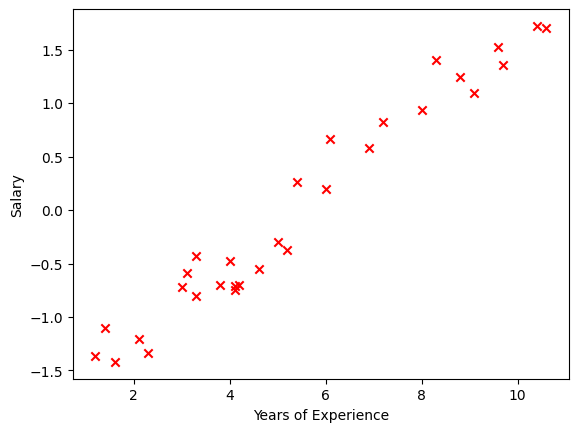

In [119]:
plt.scatter(x_train, y_train, marker='x', c='r')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

Model Function

f = w * x(i) + b  where w and b are both parameters and x is the training feature. i is in the range of 0 to nth trainin g feature

In [120]:
f = lambda w,x,b: w * x + b 

Cost Function
    I will be using the Mean Squared Error Cost Function in this notebook

In [121]:
def cost_function(x,y,w,b):
    m = x.shape[0]

    total_cost = 0.

    for i in range(m):
        cost = (f(w,x[i],b) - y[i]) ** 2
        total_cost += cost
    

    total_cost *= (1 / (2*m)) 

    return total_cost

Running it with some params

[-2.62855823 -0.33583277 -0.23608653  0.23140187  0.92644802 -0.54949076
 -0.39844886  0.49827132 -2.52391954 -1.36588548  0.40300169 -0.57011939
 -1.06628068 -1.0058258  -1.0012082   0.96472303  1.35531841 -0.52524968
  0.66603807 -0.02467922  0.64027019  0.46327063 -0.2226161   0.17653548
  0.04918164  0.40254632 -0.86981424  0.09744429  1.77452952 -0.9622985 ]
[1.57018085e+02 7.09764564e+00 5.00077751e+00 9.08171473e-02
 7.77522385e+00 1.28309449e+01 8.60249685e+00 9.22268160e-01
 1.45929841e+02 5.03328431e+01 3.22275891e-01 1.34741202e+01
 3.36988788e+01 3.07461117e+01 3.05261487e+01 8.71890062e+00
 2.14555992e+01 1.20953086e+01 2.79718835e+00 1.77643795e+00
 2.44135771e+00 6.62720521e-01 4.74588379e+00 2.47236389e-01
 1.04066680e+00 3.20216425e-01 2.45985123e+01 6.69196639e-01
 4.14209528e+01 2.87040639e+01]


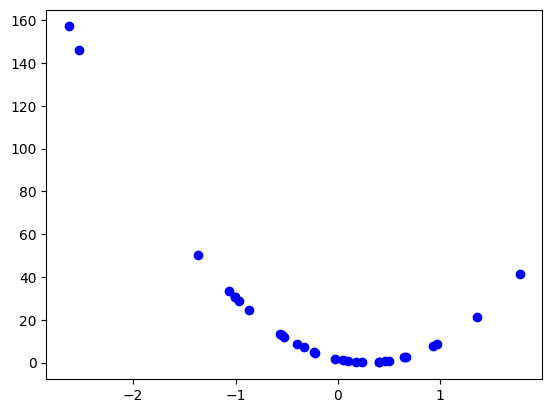

In [122]:
w_ = np.array([np.random.randn() for i in range(30)])
b_ = np.min(y_train)

cost = np.zeros(w_.shape[0])

for i in range(w_.shape[0]):
    cost[i] = cost_function(x_train,y_train,w_[i],b_)

print(w_)
print(cost)
plt.scatter(w_, cost, marker='o', c='b')
plt.show()

From the plot above we could see that at 0.2414086 we got a very minimalized value for MSE, therefore that is the value I will be using for my model

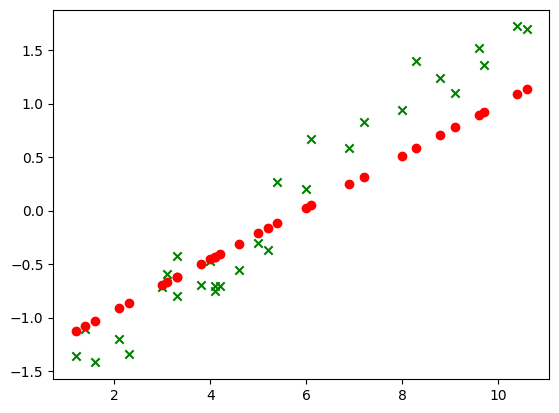

In [125]:
w = 0.2414086
prediction = np.zeros(x_train.shape[0])

for i in range(x_train.shape[0]):
    prediction[i] = f(w,x_train[i],b_)

plt.scatter(x_train, y_train, marker='x', c='g')
plt.scatter(x_train, prediction, marker='o', c='r')
plt.show()

Now we have a plot but it seems our model underfits to an extent, so I will be using the approach of gradient descent to fix params w and b

Gradient Descent
    The idea of gradient descent is to minimize the error by making adjustments to the params at each iteration

    w =  w - learning_rate * (dj_dw)
    b = b - learning_rate * (dj_db)

    dj_dw in this case will be : the differential of the cost function J w.r.t w
    dj_db in this case will be: the differential of the cost function J w.r.t b

In [126]:
def compute_gradient(x,y,w,b):

    m = x.shape[0]

    dj_dw = 0.
    dj_db = 0.

    for i in range(m):
        y_hat = f(w, x[i], b)
        dj_dw += (y_hat - y[i]) * x[i]
        dj_db += (y_hat - y[i])

    return dj_dw / m , dj_db / m 

The compute_gradient function returns our differential for w and b respectively, now plugging it into our gradient descent implementation

In [127]:
def gradient_descent(x,y,w,b,num_iters,learning_rate):
    for _ in range(num_iters):
        dj_dw, dj_db= compute_gradient(x, y, w, b)
        w -= learning_rate * dj_dw
        b -= learning_rate * dj_db

    return w,b

0.35060046540020146

-1.8979171860330903


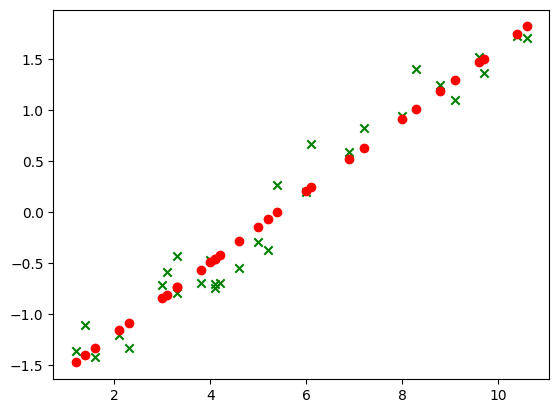

In [131]:
w_in = 0.0

b_in = 0.0

learning_rate = 0.052

num_iters = 10000

w_, b_ = gradient_descent(x_train,y_train,w_in,b_in,num_iters,learning_rate)

prediction = np.zeros(x_train.shape[0])

for i in range(x_train.shape[0]):
    prediction[i] = f(w_,x_train[i],b_)

print(w_)
print()
print(b_)
plt.scatter(x_train, y_train, marker='x', c='g')
plt.scatter(x_train, prediction, marker='o', c='r')
plt.show()

As you can see, gradient descent did a better job at fitting the model, but be careful in selecting your learning rate as high learning rate will cause divergence instead of convergence. Also the higher the num_iters the more the accuracy of your params

so now we can predict with both models

In [134]:
YearsExp = 11.0
Salary = 130000

MSE_model = lambda x: 0.2414086 * x + np.min(y_train)

GD_model = lambda x: w_ * x + b_

reverse_n = lambda y_hat: (y_hat * std) + mean

print(f"Using our Model from MSE: {reverse_n(MSE_model(YearsExp))}")
print(f"Using our Model from Gradient Descent: {reverse_n(GD_model(YearsExp))}")
print(f"True value: {Salary}")

Using our Model from MSE: 109307.27268591287
Using our Model from Gradient Descent: 128797.78950252896
True value: 130000


We can see that our Gradient Descent approach predicted the salary better than the MSE model.